### Polynomial Regression

Used when data is not linear.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng


Iteration         0, Cost: 7.32922e+03
Iteration       100, Cost: 2.26705e-01
Iteration       200, Cost: 2.26497e-01
Iteration       300, Cost: 2.26290e-01
Iteration       400, Cost: 2.26083e-01
Iteration       500, Cost: 2.25876e-01
Iteration       600, Cost: 2.25669e-01
Iteration       700, Cost: 2.25463e-01
Iteration       800, Cost: 2.25256e-01
Iteration       900, Cost: 2.25050e-01
w,b found by gradient descent: w: [1.00435057], b: 0.0090


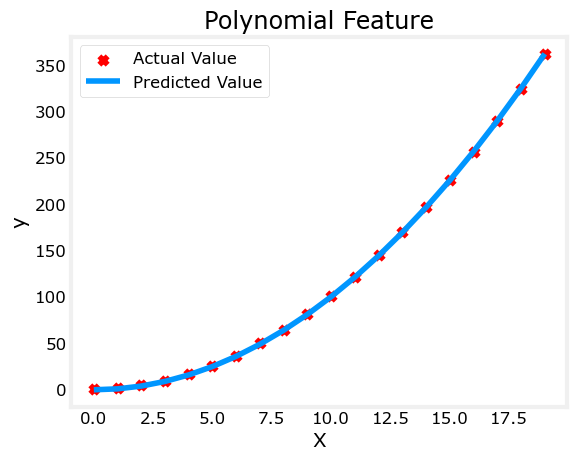

In [47]:
x = np.arange(0,20,1)
y = 1 + x**2
X = x**2
X = X.reshape(-1,1)

w,b = run_gradient_descent_feng(X, y, iterations=1000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Polynomial Feature")
plt.plot(x, np.dot(X, w) + b, label="Predicted Value") 
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

When $x^2$ is not obvious, we can use feature engineering to create polynomial features.

Iteration         0, Cost: 1.14029e+03
Iteration       100, Cost: 3.78840e+02
Iteration       200, Cost: 3.72891e+02
Iteration       300, Cost: 3.67035e+02
Iteration       400, Cost: 3.61271e+02
Iteration       500, Cost: 3.55598e+02
Iteration       600, Cost: 3.50013e+02
Iteration       700, Cost: 3.44517e+02
Iteration       800, Cost: 3.39106e+02
Iteration       900, Cost: 3.33781e+02
w,b found by gradient descent: w: [0.01166045 0.07760103 0.0552212 ], b: 0.0015


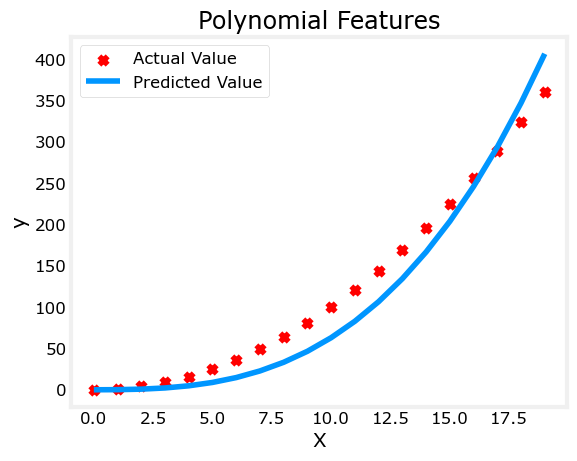

In [48]:
x = np.arange(0,20,1)
y = x**2
X = np.c_[x, x**2, x**3]
w,b = run_gradient_descent_feng(X, y, iterations=1000, alpha = 1e-7)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Polynomial Features")
# plt.plot(x, np.dot(X, w) + b, label="Predicted Value")
plt.plot(x, X @ w + b, label="Predicted Value") # same as above just a better way to write it
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Alternatively,

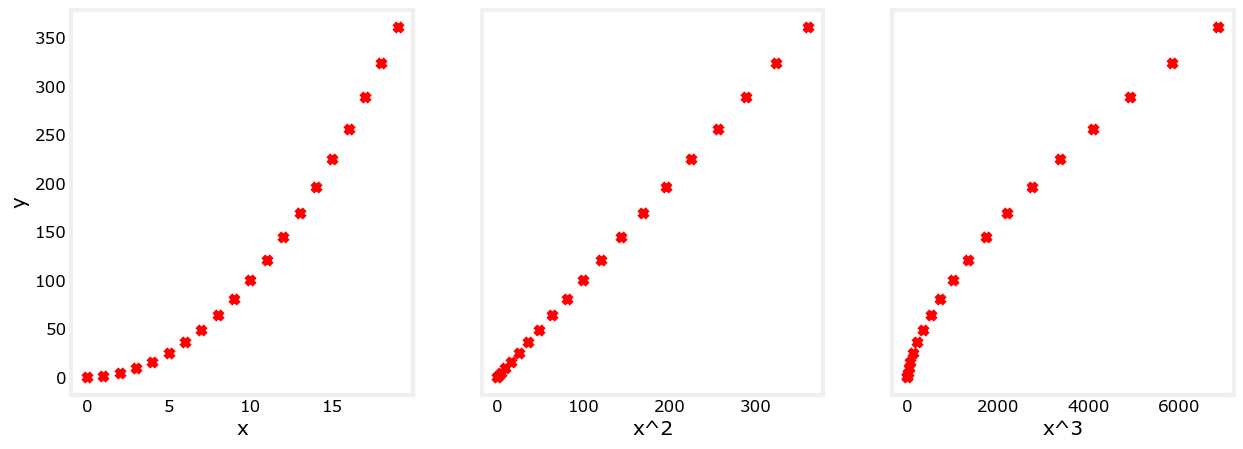

In [49]:
X_features = ['x', 'x^2', 'x^3']
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y, marker='x', c='r')
    ax[i].set_xlabel(X_features[i])
    ax[0].set_ylabel("y")
plt.show()

### Feature Scaling

If the data has different scales, scaling is used to standardize the features.

In [50]:
print(f"Peak to Peak range before scaling X:{np.ptp(X, axis=0)}")

X = zscore_normalize_features(X)
print(f"Peak to Peak range after scaling X:{np.round(np.ptp(X, axis=0), 2)}")

Peak to Peak range before scaling X:[  19  361 6859]
Peak to Peak range after scaling X:[3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.26616827e-05 1.13494579e+02 8.43238778e-05], b: 123.5000


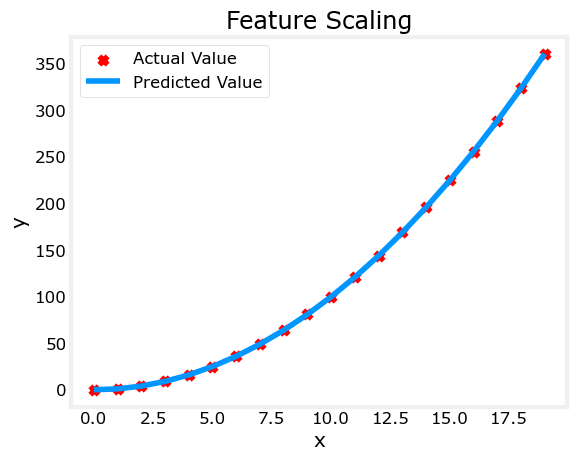

In [51]:
w,b = run_gradient_descent_feng(X, y, iterations=100000, alpha = 1e-1)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Feature Scaling")
plt.plot(x, X @ w + b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Iteration         0, Cost: 2.20310e-01
Iteration     50000, Cost: 1.62801e-02
Iteration    100000, Cost: 1.46509e-02
Iteration    150000, Cost: 1.32021e-02
Iteration    200000, Cost: 1.19083e-02
Iteration    250000, Cost: 1.07523e-02
Iteration    300000, Cost: 9.71939e-03
Iteration    350000, Cost: 8.79639e-03
Iteration    400000, Cost: 7.97156e-03
Iteration    450000, Cost: 7.23441e-03
w,b found by gradient descent: w: [ -2.31204315  -4.00665415  15.77364558   3.88924932  -7.50183813
 -10.2584208   -6.86347208  -1.35644254   3.407581     6.00409221
   6.03215815   3.67835401  -0.59779786  -6.25636272   0.05219693], b: -0.0073


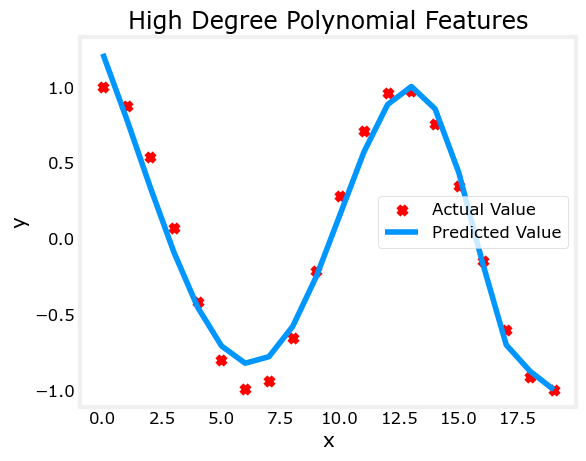

In [53]:
y = np.cos(x/2)
X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13, x**14, x**15]
X = zscore_normalize_features(X)
w,b = run_gradient_descent_feng(X, y, iterations=500000, alpha = 1e-1)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("High Degree Polynomial Features")
plt.plot(x, X @ w + b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()